<a href="https://colab.research.google.com/github/manbr21/pdi/blob/main/dithering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math as mth
import random as rd
from google.colab.patches import cv2_imshow

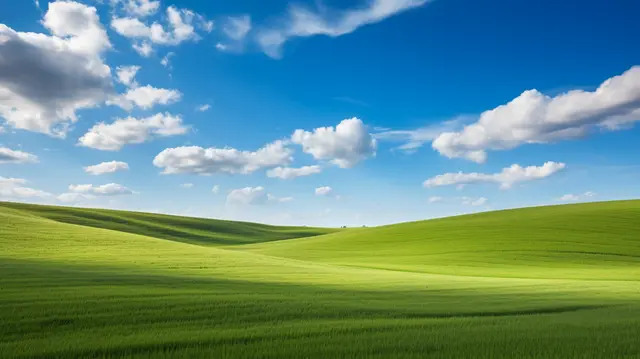

In [ ]:
foto = cv.imread('/content/windows.png')
cv2_imshow(foto)

# Transformar para cinza

(359, 640, 3)


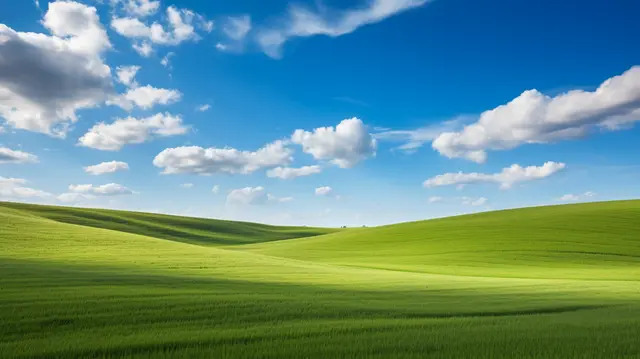

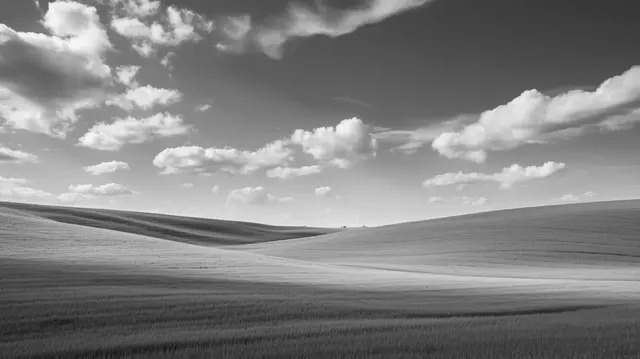

In [ ]:
dimensions = foto.shape
print(dimensions) #dimensões

foto_G = foto.copy()

for i in range(dimensions[0]):
  for j in range(dimensions[1]):
    c = mth.ceil(((59 * foto[i,j,1]) + (29 * foto[i,j,2]) + (11 * foto[i,j,0])) / 100)
    for k in range(dimensions[2]):
      foto_G[i,j,k] = c

cv2_imshow(foto)
cv2_imshow(foto_G)

# Dithering por Modulação Aleatória



d = 10

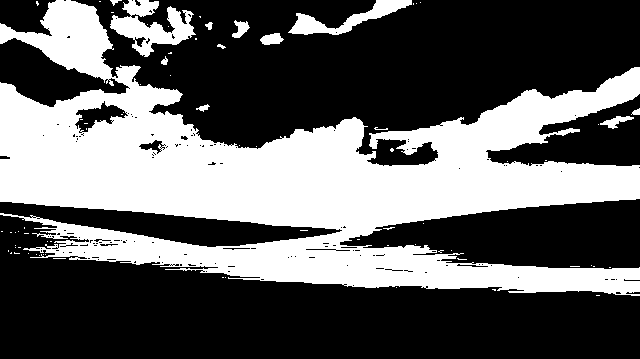

In [ ]:
th = 150
d = 10
e = d * rd.random()

foto_G1 = foto_G.copy()

for i in range(dimensions[0]):
  for j in range(dimensions[1]):
    for k in range(dimensions[2]):
      if (foto_G1[i,j,k])* 1.0 + e > th:
        foto_G1[i,j,k] = 255
      else:
        foto_G1[i,j,k] = 0

cv2_imshow(foto_G1)

d = 20

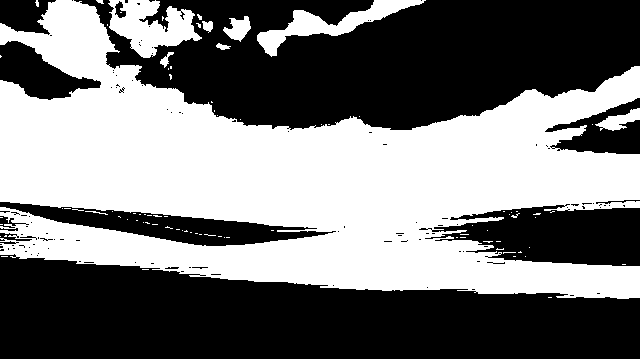

In [ ]:
th = 150
d = 20
e = d * rd.random()

foto_G2 = foto_G.copy()

for i in range(dimensions[0]):
  for j in range(dimensions[1]):
    for k in range(dimensions[2]):
      if (foto_G2[i,j,k])* 1.0 + e > th:
        foto_G2[i,j,k] = 255
      else:
        foto_G2[i,j,k] = 0

cv2_imshow(foto_G2)

d = 30

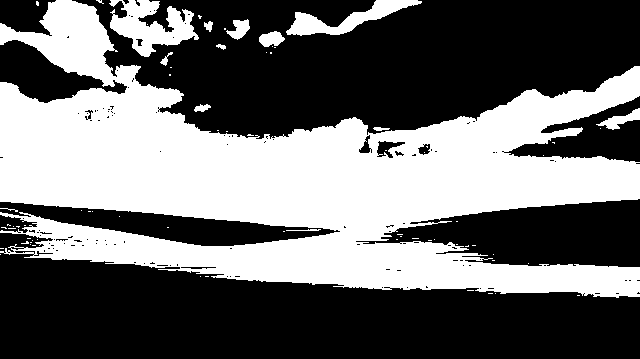

In [ ]:
th = 150
d = 30
e = d * rd.random()

foto_G3 = foto_G.copy()

for i in range(dimensions[0]):
  for j in range(dimensions[1]):
    for k in range(dimensions[2]):
      if (foto_G3[i,j,k])* 1.0 + e > th:
        foto_G3[i,j,k] = 255
      else:
        foto_G3[i,j,k] = 0

cv2_imshow(foto_G3)

# Dithering Periódico

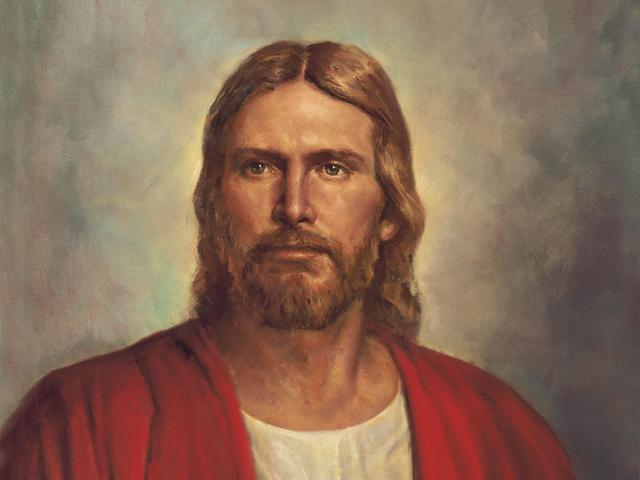

In [ ]:
fotoJC = cv.imread('/content/JesusCristo1.jpg')
cv2_imshow(fotoJC)

(480, 640, 3)


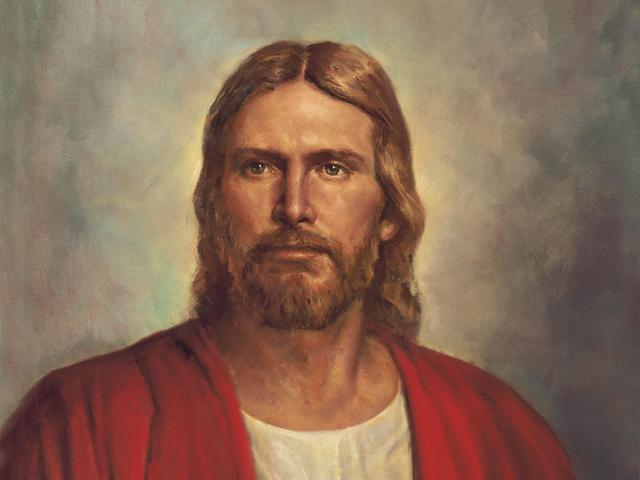

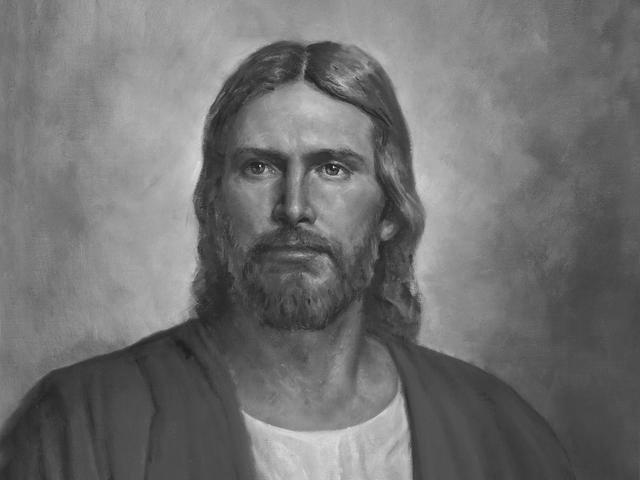

In [ ]:
dimensionsJC = fotoJC.shape
print(dimensionsJC) #dimensões

foto_GJC = fotoJC.copy()

for i in range(dimensionsJC[0]):
  for j in range(dimensionsJC[1]):
    c = mth.ceil(((59 * fotoJC[i,j,1]) + (29 * fotoJC[i,j,2]) + (11 * fotoJC[i,j,0])) / 100)
    for k in range(dimensions[2]):
      foto_GJC[i,j,k] = c

cv2_imshow(fotoJC)
cv2_imshow(foto_GJC)

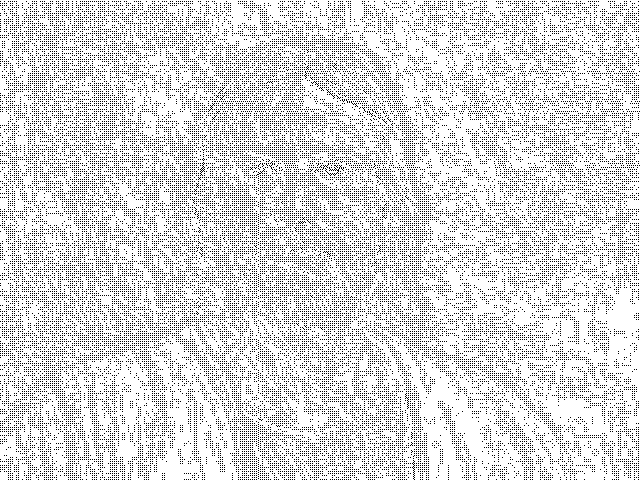

In [ ]:
#se o valor do elemento da imagem for menor que o da máscara, torna-se preto, caso contrário, torna-se branco
#os tons dos pixels no bloco devem ser normalizados para o valor máximo da máscara

foto_DJC = foto_GJC.copy()

bayer_ordem_2 = np.zeros((2, 2))
bayer_ordem_2[0,0] = 1
bayer_ordem_2[0,1] = 3
bayer_ordem_2[1,0] = 4
bayer_ordem_2[1,1] = 2

bloco = np.zeros((2,2))
visitado = np.zeros((dimensionsJC[0], dimensionsJC[1]), dtype=bool)

pode1 = False
pode2 = False

for i in range(dimensionsJC[0]):
  for j in range(dimensionsJC[1]):
    if(j + 1 < dimensionsJC[1]): #pode ir pro lado
      pode1 = True
    else:
      pode1 = False
    if(i + 1 < dimensionsJC[0]): #pode ir pra baixo
      pode2 = True
    else:
      pode2 = False

    if(pode1 == True): #se pode olhar casa do lado
      if(pode2 == True): #se pode olhar casa de baixo
        if(visitado[i,j] == False and visitado[i,j + 1] == False and visitado[i + 1, j]  == False and visitado[i + 1, j + 1] == False): #checa se todos não foram visitados
          bloco[0,0] = foto_GJC[i,j, 1]
          bloco[0,1] = foto_GJC[i,j + 1, 1]
          bloco[1,0] = foto_GJC[i + 1, j, 1]
          bloco[1,1] = foto_GJC[i + 1, j + 1, 1]

          maximo = np.amax(bloco)
          bloco = (bloco / maximo) * 4 #normaliza para max da mascara (4)

          if bloco[0,0] < bayer_ordem_2[0,0]: #i,j
            foto_DJC[i,j] = 0
          else:
            foto_DJC[i,j] = 255
          if bloco[0,1] < bayer_ordem_2[0,1]: #i,j+1
            foto_DJC[i,j + 1] = 0
          else:
            foto_DJC[i,j + 1] = 255
          if bloco[1,0] < bayer_ordem_2[1,0]: #i+1,j
            foto_DJC[i + 1,j] = 0
          else:
            foto_DJC[i + 1,j] = 255
          if bloco[1,1] < bayer_ordem_2[1,1]: #i+1,j+1
            foto_DJC[i + 1,j + 1] = 0
          else:
            foto_DJC[i + 1,j + 1] = 255

            visitado[i,j] = True
            visitado[i,j + 1] = True
            visitado[i + 1, j] = True
            visitado[i + 1, j + 1] = True

      else: #so pode pro lado
        if(visitado[i,j] == False and visitado[i,j + 1] == False): #se nao forem visitados
          bloco[0,0] = foto_GJC[i,j, 1] #pega os dois pixels da horizontal
          bloco[0,1] = foto_GJC[i,j + 1, 1]
          maximo = np.amax(bloco)
          bloco = (bloco / maximo) * 4 #normaliza

          if bloco[0,0] < bayer_ordem_2[0,0]:
            foto_DJC[i,j] = 0
          else:
            foto_DJC[i,j] = 255
          if bloco[0,1] < bayer_ordem_2[0,1]:
            foto_DJC[i,j + 1] = 0
          else:
            foto_DJC[i,j + 1] = 255

          visitado[i,j] = True
          visitado[i,j + 1] = True
    else: #nao pode pro lado
      if(pode2 == True): #pode pra baixo
        if(visitado[i,j] == False and visitado[i + 1, j] == False):
          bloco[0,0] = foto_GJC[i,j, 1]
          bloco[1,0] = foto_GJC[i + 1,j, 1]

          maximo = np.amax(bloco)
          bloco = (bloco / maximo) * 4

          if(bloco[0,0] < bayer_ordem_2[0,0]):
            foto_DJC[i,j] = 0
          else:
            foto_DJC[i,j] = 255
          if(bloco[1,0] < bayer_ordem_2[1,0]):
             foto_DJC[i + 1,j] = 0
          else:
            foto_DJC[i + 1,j] = 255

          visitado[i,j] = True
          visitado[i + 1, j] = True
      else: #nao pode olhar pra baixo e pro lado
        if(visitado[i,j] == False):
          bloco[0,0] = foto_GJC[i,j, 1]
          maximo = bloco[0,0]
          bloco = (bloco / maximo) * 4

          if bloco[0,0] < bayer_ordem_2[0,0]:
            foto_DJC[i,j] = 0
          else:
            foto_DJC[i,j] = 255

          visitado[i,j] = True

cv2_imshow(foto_DJC)

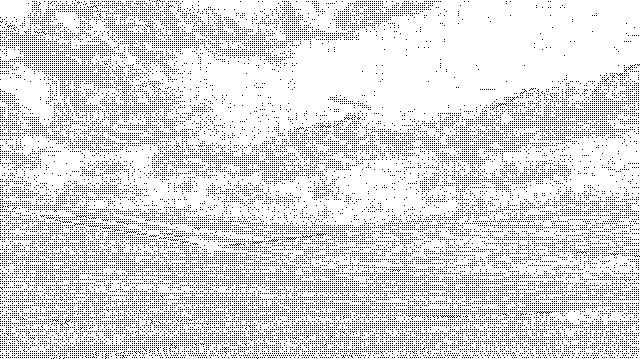

In [ ]:
#se o valor do elemento da imagem for menor que o da máscara, torna-se preto, caso contrário, torna-se branco
#os tons dos pixels no bloco devem ser normalizados para o valor máximo da máscara

foto_D = foto_G.copy()

bayer_ordem_2 = np.zeros((2, 2))
bayer_ordem_2[0,0] = 1
bayer_ordem_2[0,1] = 3
bayer_ordem_2[1,0] = 4
bayer_ordem_2[1,1] = 2

bloco = np.zeros((2,2))
visitado = np.zeros((dimensions[0], dimensions[1]), dtype=bool)

pode1 = False
pode2 = False

for i in range(dimensions[0]):
  for j in range(dimensions[1]):
    if(j + 1 < dimensions[1]): #pode ir pro lado
      pode1 = True
    else:
      pode1 = False
    if(i + 1 < dimensions[0]): #pode ir pra baixo
      pode2 = True
    else:
      pode2 = False

    if(pode1 == True): #se pode olhar casa do lado
      if(pode2 == True): #se pode olhar casa de baixo
        if(visitado[i,j] == False and visitado[i,j + 1] == False and visitado[i + 1, j]  == False and visitado[i + 1, j + 1] == False): #checa se todos não foram visitados
          bloco[0,0] = foto_G[i,j, 1]
          bloco[0,1] = foto_G[i,j + 1, 1]
          bloco[1,0] = foto_G[i + 1, j, 1]
          bloco[1,1] = foto_G[i + 1, j + 1, 1]

          maximo = np.amax(bloco)
          bloco = (bloco / maximo) * 4 #normaliza para max da mascara (4)

          if bloco[0,0] < bayer_ordem_2[0,0]: #i,j
            foto_D[i,j] = 0
          else:
            foto_D[i,j] = 255
          if bloco[0,1] < bayer_ordem_2[0,1]: #i,j+1
            foto_D[i,j + 1] = 0
          else:
            foto_D[i,j + 1] = 255
          if bloco[1,0] < bayer_ordem_2[1,0]: #i+1,j
            foto_D[i + 1,j] = 0
          else:
            foto_D[i + 1,j] = 255
          if bloco[1,1] < bayer_ordem_2[1,1]: #i+1,j+1
            foto_D[i + 1,j + 1] = 0
          else:
            foto_D[i + 1,j + 1] = 255

            visitado[i,j] = True
            visitado[i,j + 1] = True
            visitado[i + 1, j] = True
            visitado[i + 1, j + 1] = True

      else: #so pode pro lado
        if(visitado[i,j] == False and visitado[i,j + 1] == False): #se nao forem visitados
          bloco[0,0] = foto_G[i,j, 1] #pega os dois pixels da horizontal
          bloco[0,1] = foto_G[i,j + 1, 1]
          maximo = np.amax(bloco)
          bloco = (bloco / maximo) * 4 #normaliza

          if bloco[0,0] < bayer_ordem_2[0,0]:
            foto_D[i,j] = 0
          else:
            foto_D[i,j] = 255
          if bloco[0,1] < bayer_ordem_2[0,1]:
            foto_D[i,j + 1] = 0
          else:
            foto_D[i,j + 1] = 255

          visitado[i,j] = True
          visitado[i,j + 1] = True
    else: #nao pode pro lado
      if(pode2 == True): #pode pra baixo
        if(visitado[i,j] == False and visitado[i + 1, j] == False):
          bloco[0,0] = foto_G[i,j, 1]
          bloco[1,0] = foto_G[i + 1,j, 1]

          maximo = np.amax(bloco)
          bloco = (bloco / maximo) * 4

          if(bloco[0,0] < bayer_ordem_2[0,0]):
            foto_D[i,j] = 0
          else:
            foto_D[i,j] = 255
          if(bloco[1,0] < bayer_ordem_2[1,0]):
             foto_D[i + 1,j] = 0
          else:
            foto_D[i + 1,j] = 255

          visitado[i,j] = True
          visitado[i + 1, j] = True
      else: #nao pode olhar pra baixo e pro lado
        if(visitado[i,j] == False):
          bloco[0,0] = foto_G[i,j, 1]
          maximo = bloco[0,0]
          bloco = (bloco / maximo) * 4

          if bloco[0,0] < bayer_ordem_2[0,0]:
            foto_D[i,j] = 0
          else:
            foto_D[i,j] = 255

          visitado[i,j] = True

cv2_imshow(foto_D)